<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/0917_MNIST_keras_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# f-6-MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show>

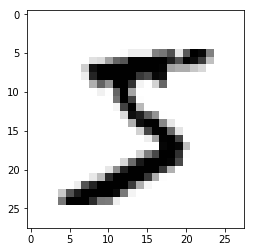

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [0]:
import numpy as np
z = np.arange(12)
z.reshape(12,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [0]:
z1 = z.reshape(-1,16);z1

In [0]:
# train_images = train_images.reshape((60000, 784))
# train_images = train_images.astype('float32')/255
x_train = train_images[0:5000,]

# test_images = test_images.reshape((10000, 784))
# test_images = test_images.astype('float32')/255
x_test = test_images[0:5500,]


# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
y_train_cat = train_labels[0:5000,]
y_test_cat = test_labels[0:5500,]

## MLP 로 구현(케라스 사용)

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (784,)))
# model.add(layers.Dense(100, activation='relu', input_dim = 28*28))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
# model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_66 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_67 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                210       
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=2, batch_size=64)

Epoch 1/2
60000/60000 [==============================] - 4s 63us/step - loss: 0.3319 - acc: 0.9050
Epoch 2/2
60000/60000 [==============================] - 3s 53us/step - loss: 0.1351 - acc: 0.9603


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_images, train_labels)
rfc.score(test_images, test_labels)

In [0]:
from sklearn.linear_model import SGDClassifier
lin = SGDdclassifier()
lin.fit(train_images, train_labels)
lin.score(test_images, test_labels)

## CNN 모델 생성

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255
#x_train = train_images[0:5000,]

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32')/255
#x_test = test_images[0:5500,]


train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
#y_train_cat = train_labels[0:5000,]
# = test_labels[0:5500,]

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)              

## 훈련

In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [163]:
model.fit(train_images, train_labels_cat, epochs=2, batch_size=64)

Epoch 1/2
60000/60000 [==============================] - 5s 85us/step - loss: 0.0361 - acc: 0.9886
Epoch 2/2
60000/60000 [==============================] - 4s 74us/step - loss: 0.0279 - acc: 0.9916


In [166]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 86us/step
test_acc =  0.9862
